<a href="https://colab.research.google.com/github/GREFITH/GREFITH/blob/main/APMMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0329 - val_loss: 8.0688e-05
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0081 - val_loss: 3.5527e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0065 - val_loss: 1.0552e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0077 - val_loss: 8.5637e-06
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0061 - val_loss: 1.9663e-06
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0084 - val_loss: 8.1298e-07
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0090 - val_loss: 8.1943e-08
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0073 - val_loss: 3.0950e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0066 - val_loss: 2.7803e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0086 - val_loss: 6.8688e-06
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0062 - val_loss: 1.2093e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━

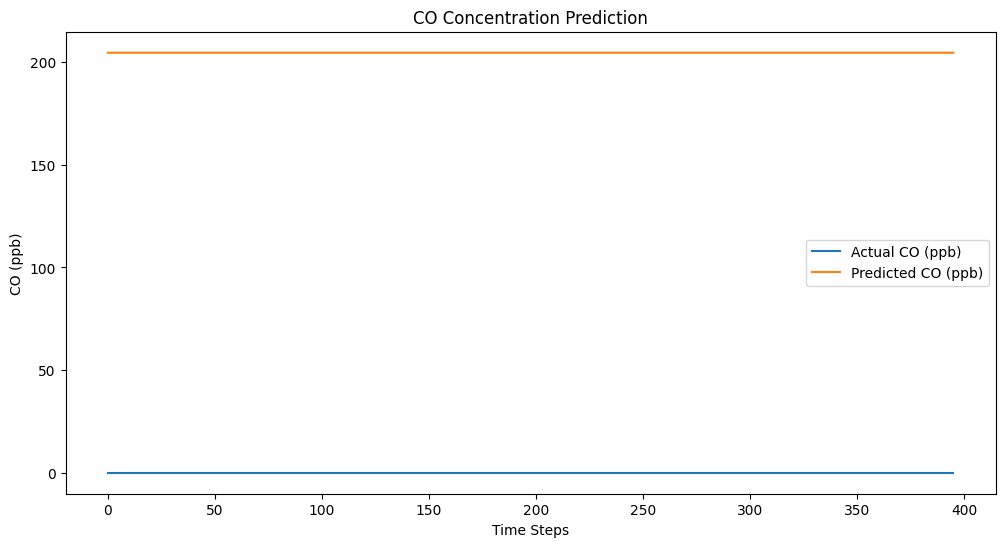

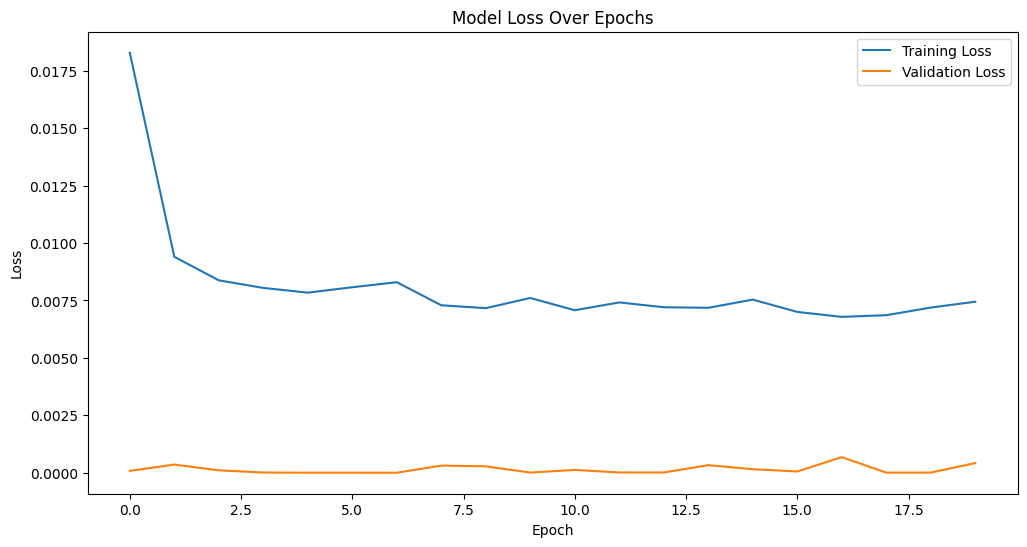

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
data = pd.read_csv('/content/openaq_location_8171_measurments.csv')  # Replace with your file path or use the data directly
co_data = data[data['parameter'] == 'co'][['datetimeUtc', 'value']].copy()
co_data['datetimeUtc'] = pd.to_datetime(co_data['datetimeUtc'])
co_data = co_data.sort_values('datetimeUtc')
co_values = co_data['value'].values.reshape(-1, 1)

# Step 2: Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(co_values)

# Step 3: Create Sequences for Time-Series Prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24  # Using 24 time steps (e.g., 6 hours if 15-min intervals)
X, y = create_sequences(scaled_data, seq_length)

# Step 4: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 8: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluate the Model
mse = np.mean((predictions - y_test_actual) ** 2)
print(f"Mean Squared Error: {mse}")

# Step 10: Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual CO (ppb)')
plt.plot(predictions, label='Predicted CO (ppb)')
plt.title('CO Concentration Prediction')
plt.xlabel('Time Steps')
plt.ylabel('CO (ppb)')
plt.legend()
plt.show()

# Step 11: Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0293 - val_loss: 1.3590e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - val_loss: 6.3276e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0060 - val_loss: 8.6063e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0091 - val_loss: 1.6377e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0083 - val_loss: 2.7995e-06
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0071 - val_loss: 6.8144e-05
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0087 - val_loss: 1.5200e-04
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0062 - val_loss: 4.0225e-04
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0097 - val_loss: 1.4613e-06
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - val_loss: 1.3494e-04
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0105 - val_loss: 2.0877e-06
Epoch 12/50

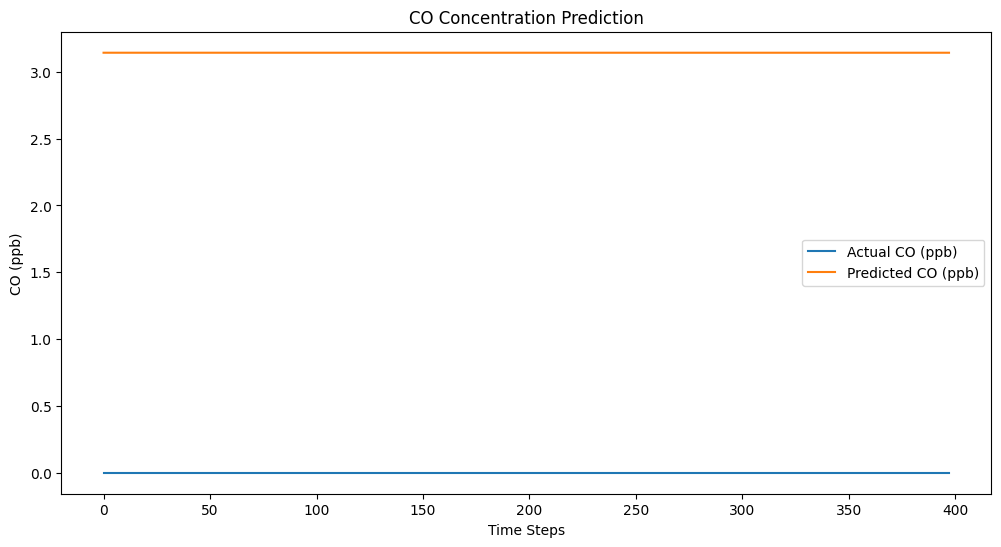

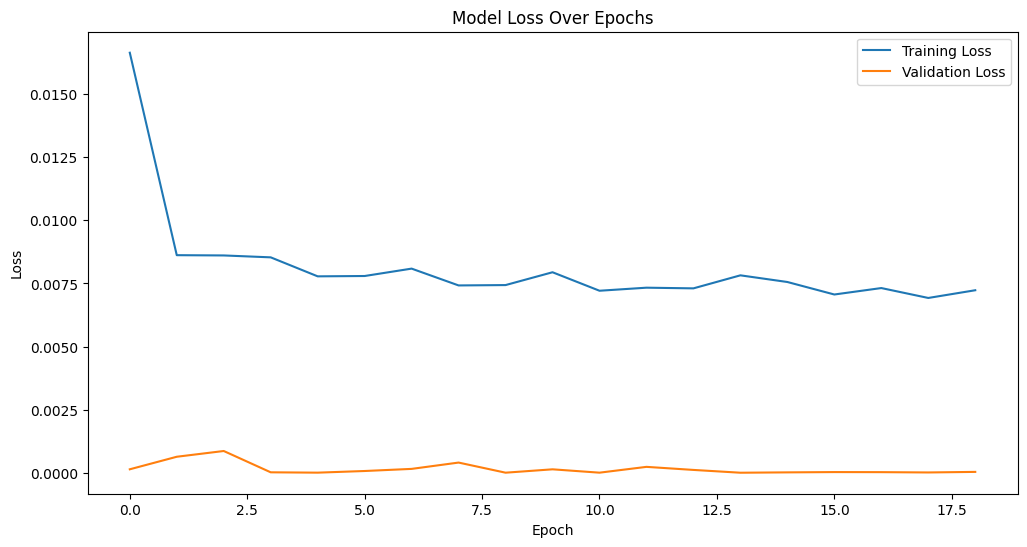

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and Preprocess Data
data = pd.read_csv('/content/openaq_location_8171_measurments.csv')  # Replace with your file path
co_data = data[data['parameter'] == 'co'][['datetimeUtc', 'value']].copy()
co_data['datetimeUtc'] = pd.to_datetime(co_data['datetimeUtc'])
co_data = co_data.sort_values('datetimeUtc')
co_values = co_data['value'].values.reshape(-1, 1)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(co_values)

# Create Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Reduced to 3 hours (12 * 15 min)
X, y = create_sequences(scaled_data, seq_length)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Simplified LSTM Model
model = Sequential()
model.add(LSTM(units=20, return_sequences=False, input_shape=(seq_length, 1)))  # Single layer, fewer units
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Dense(units=1))

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mse = np.mean((predictions - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual CO (ppb)')
plt.plot(predictions, label='Predicted CO (ppb)')
plt.title('CO Concentration Prediction')
plt.xlabel('Time Steps')
plt.ylabel('CO (ppb)')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()